In [1]:
using LinearAlgebra
using PyPlot
using JLD2
using QuanticsTCI
import TensorCrossInterpolation as TCI
using Tullio

include("haldane.jl")

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 9
rcParams["text.usetex"] = true
rcParams["font.family"] = "serif"
#rcParams["text.latex.preamble"] = [raw"\usepackage{amsmath} \usepackage{bm}"]
rcParams["font.serif"] = ["Computer Modern Roman"]
rcParams["lines.linewidth"] = 1.0
rcParams["lines.markersize"] = 2

Did not find xfac. QTT functions will not be available.PyError (PyImport_ImportModule

The Python package xfacpy could not be imported by pyimport. Usually this means
that you did not install xfacpy in the Python version being used by PyCall.

PyCall is currently configured to use the Python version at:

/Users/Ritter.Marc/.pyenv/versions/3.8.15/bin/python

and you should use whatever mechanism you usually use (apt-get, pip, conda,
etcetera) to install the Python package containing the xfacpy module.

One alternative is to re-configure PyCall to use a different Python
version on your system: set ENV["PYTHON"] to the path/name of the python
executable you want to use, run Pkg.build("PyCall"), and re-launch Julia.

Another alternative is to configure PyCall to use a Julia-specific Python
distribution via the Conda.jl package (which installs a private Anaconda
Python distribution), which has the advantage that packages can be installed
and kept up-to-date via Julia.  As explained in the P

2

In [2]:
nqs = [10, 12, 14, 20]
deltams = [-4e-3:1e-4:-1e-4..., -1e-5, 0, 1e-5, 1e-4:1e-4:4e-3...]

files = []
for nq in nqs
    push!(
        files,
        [load("haldane_results/nq$(nq)_deltam$(deltam).jld2") for deltam in deltams]
    )
end

pwd()

┌ Warning: saved type TensorCrossInterpolation.TensorCI{Float64} is missing field maxsamplevalue in workspace type; reconstructing
└ @ JLD2 /Users/Ritter.Marc/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:164
┌ Warning: saved type TensorCrossInterpolation.TensorCI{Float64} is missing field maxsamplevalue in workspace type; reconstructing
└ @ JLD2 /Users/Ritter.Marc/.julia/packages/JLD2/1YVED/src/data/reconstructing_datatypes.jl:164


"/Users/Ritter.Marc/src/quanticstci.jl/example/chern"

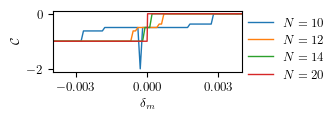

In [3]:
fig, axs = subplots(figsize=(246/72, 90/72))
for (nq, l) in zip(nqs, files)
    axs.plot(deltams, [f["chernnumber"] for f in l], label="\$N = $nq\$")
end
axs.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=false, borderpad=0)
axs.set_xlim(-0.004, 0.004)
axs.set_xticks([-0.003, 0, 0.003])
axs.set_xlabel(L"$\delta_m$")
axs.set_ylabel(L"$\mathcal{C}$")

tight_layout()

fig.savefig("haldane-chern-transition.pdf")

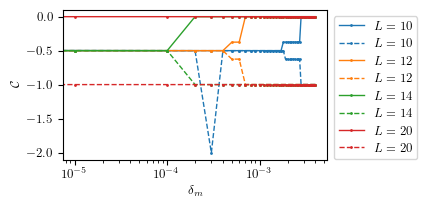

PyObject Text(21.069600110696, 0.5, '$\\mathcal{C}$')

In [4]:
fig, axs = subplots(figsize=(246/72, 140/72))
for (nq, l) in zip(nqs, files)
    line = axs.semilogx(deltams, [f["chernnumber"] for f in l], label="\$L = $nq\$", marker=".")[1]
    axs.semilogx(-deltams, [f["chernnumber"] for f in l], label="\$L = $nq\$", color=line.get_color(), linestyle="dashed", marker=".")
end
axs.legend(loc="upper left", bbox_to_anchor=(1, 1))
axs.set_xlabel(L"$\delta_m$")
axs.set_ylabel(L"$\mathcal{C}$")

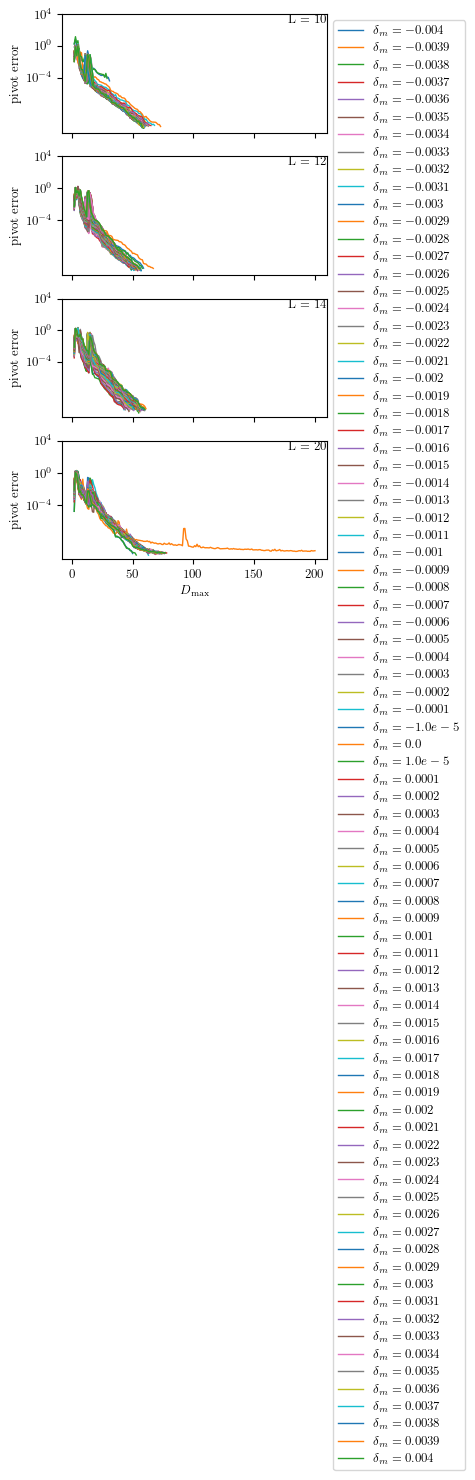

In [5]:
fig, axs = subplots(nrows=length(files), figsize=(246/72, 510/72), sharex=true)
for (nq, ax, l) in zip(nqs, axs, files)
    ax.annotate(
        "L = $nq",
        (1, 1),
        xycoords="axes fraction",
        horizontalalignment="right",
        verticalalignment="top"
    )
    
    for (deltam, f) in zip(deltams, l)
        ax.semilogy(f["ranks"], f["errors"], label="\$\\delta_m = $deltam\$")
    end
    
    ax.set_yticks([1e-4, 1, 1e4])
end
axs[1].legend(loc="upper left", bbox_to_anchor=(1, 1))

axs[end].set_xlabel(L"$D_{\max}$")
for ax in axs    
    ax.set_ylabel("pivot error")
end

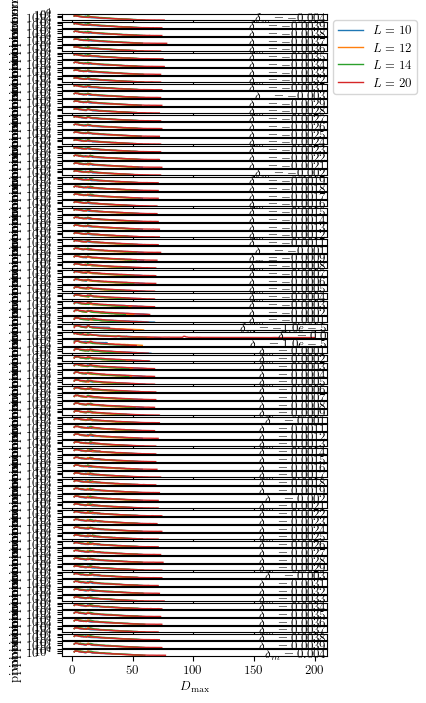

In [6]:
fig, axs = subplots(nrows=length(files[1]), figsize=(246/72, 600/72), sharex=true)
for (nq, l) in zip(nqs, files)
    for (deltam, ax, f) in zip(deltams, axs, l)
        ax.semilogy(f["ranks"], f["errors"], label="\$L = $nq\$")
    end
end

for (deltam, ax) in zip(deltams, axs)
    ax.set_yticks([1e-4, 1, 1e4])
    ax.annotate(
        "\$\\delta_m = $deltam\$",
        (1, 1),
        xycoords="axes fraction",
        horizontalalignment="right",
        verticalalignment="top"
    )
end
axs[1].legend(loc="upper left", bbox_to_anchor=(1, 1))

axs[end].set_xlabel(L"$D_{\max}$")
for ax in axs    
    ax.set_ylabel("pivot error")
end

In [7]:
fig, axs = subplots(nrows=length(files), figsize=(246/72, 510/72), sharex=true)
for (ax, l) in zip(axs, files)
    for (deltam, f) in zip(deltams, l)
        ax.plot(f["ranks"], f["cherns"], label="\$\\delta_m = $deltam\$")
    end
    ax.set_ylim(-2, 1)
end
axs[1].legend(loc="upper left", bbox_to_anchor=(1, 1))
    
axs[end].set_xlabel(L"$D_{\max}$")
for ax in axs    
    ax.set_ylabel(L"$\mathcal{C}$")
    ax.axhline(-0.5, linewidth=0.5, color="gray")
    ax.axhline(-1.0, linewidth=0.5, color="gray")
    ax.axhline(0.0, linewidth=0.5, color="gray")
end

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/Ritter.Marc/.julia/packages/PyCall/ygXW2/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('x and y must have same first dimension, but have shapes (57,) and (0,)')
  File "/Users/Ritter.Marc/.pyenv/versions/3.8.15/lib/python3.8/site-packages/matplotlib/axes/_axes.py", line 1662, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/Users/Ritter.Marc/.pyenv/versions/3.8.15/lib/python3.8/site-packages/matplotlib/axes/_base.py", line 311, in __call__
    yield from self._plot_args(
  File "/Users/Ritter.Marc/.pyenv/versions/3.8.15/lib/python3.8/site-packages/matplotlib/axes/_base.py", line 504, in _plot_args
    raise ValueError(f"x and y must have same first dimension, but "


In [8]:
fig, axs = subplots(nrows=length(files[1]), figsize=(246/72, 720/72), sharex=true)
for (nq, l) in zip(nqs, files)
    for (deltam, ax, f) in zip(deltams, axs, l)
        ax.plot(f["ranks"], f["cherns"], label="\$L = $nq\$")
    end
end

for (deltam, ax) in zip(deltams, axs)
    ax.set_ylim(-2, 1)
    ax.annotate(
        "\$\\delta_m = $deltam\$",
        (1, 1),
        xycoords="axes fraction",
        horizontalalignment="right",
        verticalalignment="top"
    )
    if deltam == 0.0
        ax.axhline(-0.5, linewidth=0.5, color="gray")
    elseif deltam < 0.0
        ax.axhline(-1.0, linewidth=0.5, color="gray")
    else
        ax.axhline(0.0, linewidth=0.5, color="gray")
    end
end
axs[1].legend(loc="upper left", bbox_to_anchor=(1, 1))

axs[end].set_xlabel(L"$D_{\max}$")
for ax in axs    
    ax.set_ylabel(L"$\mathcal{C}$")
end

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/Ritter.Marc/.julia/packages/PyCall/ygXW2/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('x and y must have same first dimension, but have shapes (57,) and (0,)')
  File "/Users/Ritter.Marc/.pyenv/versions/3.8.15/lib/python3.8/site-packages/matplotlib/axes/_axes.py", line 1662, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/Users/Ritter.Marc/.pyenv/versions/3.8.15/lib/python3.8/site-packages/matplotlib/axes/_base.py", line 311, in __call__
    yield from self._plot_args(
  File "/Users/Ritter.Marc/.pyenv/versions/3.8.15/lib/python3.8/site-packages/matplotlib/axes/_base.py", line 504, in _plot_args
    raise ValueError(f"x and y must have same first dimension, but "


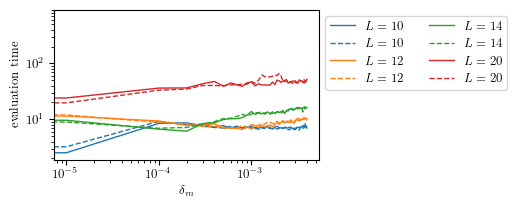

PyObject Text(21.069600110696, 0.5, 'evaluation time')

In [9]:
fig, axs = subplots(figsize=(246/72, 140/72))
for (nq, l) in zip(nqs, files)
    line = axs.loglog(deltams, [f["walltime"] for f in l], label="\$L = $nq\$")[1]
    axs.loglog(-deltams, [f["walltime"] for f in l], linestyle="dashed", color=line.get_color(), label="\$L = $nq\$")
end
axs.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2)
axs.set_xlabel(L"$\delta_m$")
axs.set_ylabel("evaluation time")

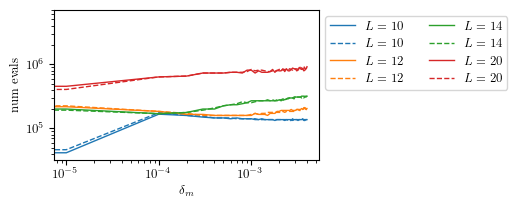

PyObject Text(21.069600110696, 0.5, 'num evals')

In [10]:
fig, axs = subplots(figsize=(246/72, 140/72))
for (nq, l) in zip(nqs, files)
    line = axs.loglog(deltams, [f["nevals"] for f in l], label="\$L = $nq\$")[1]
    axs.loglog(-deltams, [f["nevals"] for f in l], linestyle="dashed", color=line.get_color(), label="\$L = $nq\$")
end
axs.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2)
axs.set_xlabel(L"$\delta_m$")
axs.set_ylabel("num evals")

In [11]:
fig, axs = subplots(nrows=length(files[1]), figsize=(246/72, 600/72), sharex=true)
for (deltam, ax) in zip(deltams, axs)
    ax.semilogy(
        1:20-1, [min(4^x, 4^(20-x)) for x in 1:20-1],
        linewidth=0.5, color="gray")
    ax.annotate(
        "\$\\delta_m = $deltam\$",
        (1, 1),
        xycoords="axes fraction",
        horizontalalignment="right",
        verticalalignment="top"
    )
end
    
for (nq, l) in zip(nqs, files)
    for (ax, f) in zip(axs, l)
        ax.semilogy(1:nq-1, TCI.linkdims(f["tci"]), label="\$L = $nq\$")
    end
end
    
axs[1].legend(loc="upper left", bbox_to_anchor=(1, 1))

axs[end].set_xlabel(L"$\ell$")
for ax in axs    
    ax.set_ylabel(L"$D_\ell$")
    ax.set_ylim(2, 400)
end

LoadError: MethodError: no method matching linkdims(::JLD2.ReconstructedTypes.var"##TensorCrossInterpolation.TensorCI{Float64}#291")
[0mClosest candidates are:
[0m  linkdims([91m::TensorCrossInterpolation.TensorCI{V}[39m) where V at ~/src/TensorCrossInterpolation.jl/src/tensorci.jl:150

In [12]:
chfile = load("haldane_results_oos/nq20_deltam-1.0e-5.jld2")
tci = chfile["tci"]
tt = TCI.tensortrain(tci)

chfile

Dict{String, Any} with 11 entries:
  "chernnumber" => -1.0
  "ranks"       => [2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  41, 42, 43, 44, 45, 46, …
  "nquantics"   => 20
  "cherns"      => [0.307779, -0.851207, -0.0688465, -0.559176, -0.381671, -0.3…
  "ooserrors"   => [0.430642, 0.430644, 0.429281, 0.435526, 3.64855e-6, 4.05084…
  "tci"         => TensorCrossInterpolation.TensorCI{Float64} with ranks 50
  "deltam"      => -1.0e-5
  "errors"      => [1.61117e-5, 0.856378, 0.15348, 1.53107, 0.29016, 0.0326173,…
  "walltime"    => 412.258
  "nevals"      => 421111
  "inserrors"   => [6.89474e-5, 0.0515223, 0.12666, 0.124955, 0.0140464, 0.0032…

In [13]:
chfile["nevals"]

421111

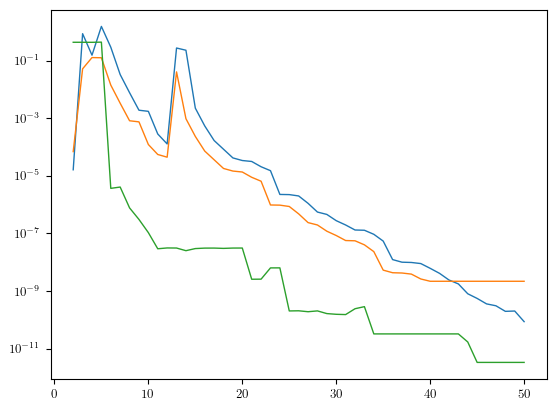

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x36aec69a0>

In [14]:
semilogy(chfile["ranks"], chfile["errors"])
semilogy(chfile["ranks"], chfile["inserrors"])
semilogy(chfile["ranks"], chfile["ooserrors"])

In [15]:
nplot = 1024

domainboundx = [-4pi/3, 4pi/3]
domainboundy = [-6pi/(3sqrt(3)), 6pi/(3sqrt(3))]
intextent = [domainboundy..., domainboundx...]

t2 = 0.1
phi = pi/2
m = t2 * 3sqrt(3) + chfile["deltam"]

nquantics = length(tt)
ndiscretization = 2^nquantics
kxvals = range(domainboundx..., length=ndiscretization+1)
kxvals = 0.5 .* (kxvals[1:ndiscretization] .+ kxvals[2:end])
kyvals = range(domainboundy..., length=ndiscretization+1)
kyvals = 0.5 .* (kyvals[1:ndiscretization] .+ kyvals[2:end])

plotstep = div(ndiscretization, nplot)

function scalar(a::Matrix)
    if size(a) == (1, 1)
        return first(a)
    else
        throw(ArgumentError("$a is not a scalar."))
    end
end

function evaluate_qtt(qtt, q::Vector{<:Integer})
    return scalar(prod(T[:, i, :] for (T, i) in zip(qtt, q)))
end


qttdata = [
    evaluate_qtt(tt, merge_dimensions(index_to_quantics(kxi, nquantics), index_to_quantics(kyi, nquantics)))
    for kxi in 1:plotstep:length(kxvals), kyi in 1:plotstep:length(kyvals)
]

linecutsqtt = Vector{Float64}[]
linecutsorig = Vector{Float64}[]
cutstep = div(ndiscretization, 8)
cutplotstep = 1024
quarter = div(ndiscretization, 4)
cutxvals = 2*quarter+1:cutstep:3*quarter+1
cutyinds = 684:cutplotstep:ndiscretization
    
for kxi in cutxvals
    push!(
        linecutsqtt,
        [
            evaluate_qtt(tt, merge_dimensions(index_to_quantics(kxi, nquantics), index_to_quantics(kyi, nquantics)))
            for kyi in cutyinds
        ]
    )
    push!(
        linecutsorig,
        [
            chern.berrycurvature_quantics_dets(
                ki -> haldane([kxvals[ki[1]], kyvals[ki[2]]], t2, phi, m),
                1, index_to_quantics([kxi, kyi], nquantics), nquantics)
            for kyi in cutyinds
        ]
    )
end

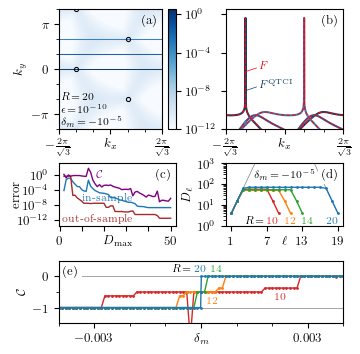

In [16]:
# --- Colors ---

insamplecolor = "tab:blue"
outofsamplecolor = "brown"
integralcolor = "purple"
origcherncolor = "red"
origchernls = "dashed"
origchernlw = 0.75

plottransform2(x) = log10(abs(x))
cmap = "Blues"

#linecmap = get_cmap("Set1")
#colorlist = ["blue", "mediumblue", "midnightblue"]
colorlist = ["#143E65", "#265EA4", "#3981C3"]

function colorN(N::Int)
    #Ncmap = get_cmap("plasma")
    #return Ncmap((N - 10)/15)
    Dict(
        10 => "tab:red",
        12 => "tab:orange",
        14 => "tab:green",
        #16 => "tab:blue",
        20 => "tab:blue"
    )[N]
end

# --- Layout ---

figurew = 246
padw, padh = (5, 1)

yaxislabelw = 36
axw = (figurew - padw) / 2 - yaxislabelw

colorbarw = 6
colorbarpad = 4
colorplotaxw = figurew - padw - axw - colorbarw - colorbarpad - yaxislabelw * 2
colorplotaspectratio = (intextent[4] - intextent[3]) / (intextent[2] - intextent[1])
topaxh = colorplotaspectratio * colorplotaxw

axh = 45
xaxislabelh = 25
figureh = 2 * axh + topaxh + 3 * xaxislabelh + padh

colx = [i * yaxislabelw + (i - 1) * axw for i in 1:2]
rowy = [i * xaxislabelh + (i - 1) * axh for i in 1:3]

colorbarx = yaxislabelw + colorplotaxw + colorbarpad
cutaxx = figurew - axw - padw
cherndeltaw = 2 * axw + yaxislabelw

units = [figurew, figureh, figurew, figureh]
ptperinch = 72

function customxaxislabel(ax, label, xy=(0.5, 0))
    ax.annotate(
        label,
        xy=xy,
        xycoords="axes fraction",
        xytext=(0, -3.5-rcParams["xtick.major.size"]),
        textcoords="offset points",
        verticalalignment="top",
        horizontalalignment="center")
end

# --- create figure, axes ---

fig = figure(figsize=(figurew, figureh)./ptperinch)
ax_contourplot = fig.add_axes((colx[1], rowy[3], colorplotaxw, topaxh) ./ units)
ax_colorbar = fig.add_axes((colorbarx, rowy[3], colorbarw, topaxh) ./ units)
ax_lineplot = fig.add_axes((cutaxx, rowy[3], axw, topaxh) ./ units)

errorax = fig.add_axes((colx[1], rowy[2], axw, axh) ./ units)
bonddimax = fig.add_axes((colx[2], rowy[2], axw, axh) ./ units)
cherndeltaax = fig.add_axes((colx[1], rowy[1], cherndeltaw, axh) ./ units)

# --- berry plots --- 

for (xi, cutqtt, cutorig, color) in zip(cutxvals, linecutsqtt, linecutsorig, colorlist)
    ax_lineplot.semilogy(
        kyvals[1:cutplotstep:end], abs.(cutqtt),
        color=color, linewidth=1.5,
        label="QTT")
    ax_lineplot.semilogy(
        kyvals[1:cutplotstep:end], abs.(cutorig),
        color=origcherncolor, linestyle=origchernls, linewidth=origchernlw,
        label="original")
    ax_contourplot.axhline(kxvals[xi], color=color, linewidth=0.75)
end

vmin = max(
    min(minimum(plottransform2.(qttdata))...),
    -12)

ax_lineplot.set_xlim(kyvals[1], kyvals[end])
ax_lineplot.set_ylim(10^vmin, ax_lineplot.get_ylim()[2])
#ax_lineplot.set_xlabel(L"$k_x$")
#ax_lineplot.set_ylabel(L"$\tilde F_{12}$ (QTT rep)")
#ax_lineplot.legend(
#    frameon=false,
#    borderpad=0,
#    handlelength=0.7,
#    columnspacing=0.3,
#    handletextpad=0.3,
#    borderaxespad=0,
#    fontsize="small"
#)

#ax_lineplot.annotate(
#    L"$F(\mathbf{k})$",
#    xy=(-pi/(3sqrt(3)), 1),
#    xycoords=("data", "axes fraction"),
#    xytext=(0, -2),
#    textcoords="offset points",
#    verticalalignment="top",
#    horizontalalignment="center",
#    fontsize="small"
#)

vmax = max(
    0,
    plottransform2(ax_lineplot.get_ylim()[2]),
    maximum.(plottransform2.(qttdata))...)

contourplot = ax_contourplot.imshow(
    plottransform2.(qttdata),
    cmap=cmap, vmin=vmin, vmax=vmax, extent=intextent)
colorbar(contourplot, cax=ax_colorbar)
ax_colorbar.tick_params(top=true, labeltop=true, bottom=false, labelbottom=false)

peakpos = [
    -4pi/(3sqrt(3)) 4pi/3;
    -4pi/(3sqrt(3)) 0;
    +2pi/(3sqrt(3)) +2pi/3;
    +2pi/(3sqrt(3)) -2pi/3
]
ax_contourplot.plot(peakpos[:, 1], peakpos[:, 2], "ko", markeredgewidth=0.75, markersize=3, fillstyle="none")

ax_contourplot.set_ylabel(L"$k_y$")
#ax_contourplot.set_xlabel(L"$k_x$")

chernyticks = ceil(Int, vmin):4:0
ax_colorbar.set_yticks(chernyticks, ["\$10^{$l}\$" for l in chernyticks])
ax_lineplot.set_yticks(10.0 .^ chernyticks, ["" for l in chernyticks])

ax_contourplot.set_yticks(
    minor=true,
    [-4pi/3, -2pi/3, -pi/3, 0, pi/3, 2pi/3, 4pi/3]
)
ax_contourplot.set_yticks(
    [-pi, 0, pi],
    [L"$-\pi$", L"$0$", L"$\pi$"]
)

for ax in [ax_contourplot, ax_lineplot]
    ax.set_xticks(
        minor=true,
        [-4pi/(3sqrt(3)), -2pi/(3sqrt(3)), 0, 4pi/(3sqrt(3)), 2pi/(3sqrt(3))]
    )
    ax.set_xticks(
        [-2pi/(sqrt(3)), 0, 2pi/(sqrt(3))],
        [L"$-\frac{2\pi}{\sqrt{3}}$", "", L"$\frac{2\pi}{\sqrt{3}}$"]
    )
    customxaxislabel(ax, L"$k_x$")
end

for (contourplotlabellineyindex, label) in enumerate([
    L"$\delta_m\!=\!-10^{-5}$",
    L"$\epsilon\!=\!10^{-10}$",
    L"$R\!=\!20_{\vphantom{m}}$"
])
    ylineskip=9
    ax_contourplot.annotate(
        label,
        xy=(0, 0),
        xycoords="axes fraction",
        xytext=(2, 3 + ylineskip * (contourplotlabellineyindex - 1)),
        textcoords="offset points",
        verticalalignment="baseline",
        horizontalalignment="left",
        fontsize="small"
    )
end

flabelxoffset = 10
flabelyoffset = 0

ax_lineplot.annotate(
    L"$F$",
    xy=(-4pi/(3sqrt(3)), 1e-6),
    xytext=(flabelxoffset, flabelyoffset),
    textcoords="offset points",
    horizontalalignment="left",
    verticalalignment="bottom",
    color=origcherncolor,
    fontsize="small",
    arrowprops=Dict(
        "arrowstyle"=>"-",
#        "connectionstyle"=>"arc3",
#        "angleA"=-90,
#        "angleB"=135
        "shrinkA"=> 0,
        "shrinkB"=> 0,
        "color"=>origcherncolor,
        "linewidth" => 0.5,
        "relpos"=>(0, 0.5),
    )
)

ax_lineplot.annotate(
    L"$F^{\mathrm{QTCI}}$",
    xy=(-4pi/(3sqrt(3)), 1e-8),
    xytext=(flabelxoffset, flabelyoffset),
    textcoords="offset points",
    horizontalalignment="left",
    verticalalignment="bottom",
    color=colorlist[1],
    fontsize="small",
    arrowprops=Dict(
        "arrowstyle"=>"-",
#        "connectionstyle"=>"arc3",
#        "angleA"=-90,
#        "angleB"=135
        "shrinkA"=> 0,
        "shrinkB"=> 0,
        "color"=>colorlist[1],
        "linewidth" => 0.5,
        "relpos"=>(0, 0.5),
    )
)

# --- error plot ---

ranks = chfile["ranks"]
cherns = chfile["cherns"]

#errorax.axhline(1e-4, color="gray", linewidth=0.5)
errorax.semilogy(ranks, chfile["inserrors"], label="in-sample", color=insamplecolor)
errorax.semilogy(ranks, chfile["ooserrors"], label="out-of-sample", color=outofsamplecolor)
errorax.semilogy(ranks, abs.(cherns .+ 1), label=L"$\mathcal{C}$", color=integralcolor)
errorax.set_ylim(3e-14, 1e3)

#errorax.set_xlim(0, errorax.get_xlim()[2])
#errorax.set_ylabel(L"$\mathrm{error}$")
errorax.set_yticks([1e-12, 1e-8, 1e-4, 1]) #, [L"$"" L"$10^{-8}$", L"$10^0$"])
#errorax.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=false, borderpad=0)

#errorxticks = [0, 10:10:TCI.rank(tci)...]
#if !(TCI.rank(tci) in errorxticks)
#    push!(errorxticks, TCI.rank(tci))
#end

errorax.annotate(
    "in-sample",
    xy=(20, 1e-6),
    xytext=(2, 0),
    textcoords="offset points",
    horizontalalignment="center",
    verticalalignment="center",
    color=insamplecolor,
    fontsize="small",
)
errorax.annotate(
    "out-of-sample",
    xy=(35, 1e-10),
    xytext=(-4, -1),
    textcoords="offset points",
    horizontalalignment="right",
    verticalalignment="top",
    color=outofsamplecolor,
    fontsize="small",
)

errorax.annotate(
    L"$\mathcal{C}$",
    xy=(15, 1),
    xytext=(2, 0),
    textcoords="offset points",
    horizontalalignment="left",
    verticalalignment="center",
    color=integralcolor,
    fontsize="small",
)
errorax.annotate(
    "error",
    xy=(0, 0.5),
    xycoords="axes fraction",
    xytext=(-35, 0),
    textcoords="offset points",
    rotation=90,
    verticalalignment="center",
)

errorax.set_xticks(0:10:50, [L"$0$", "", "", "", "", "50"])
customxaxislabel(errorax, L"$D_{\max}$")

# --- bond dim plot ---

bonddimax.semilogy(1:nquantics-1, [min(4^x, 4^(nquantics-x)) for x in 1:nquantics-1], color="gray", linewidth=0.5)

bonddimindex = 28
for (nq, f) in zip(nqs, files)
    bonddimax.semilogy(1:nq-1, TCI.linkdims(f[bonddimindex]["tci"]), marker=".", color=colorN(nq))
end
    
bonddimax.set_xticks(1:6:nquantics-1)
customxaxislabel(bonddimax, L"$\ell$")
#bonddimax.set_xticks(minor=true, 4:6:nquantics-1, ["", L"$\ell$", ""])

bonddimax.set_ylabel(L"$D_\ell$")
bonddimax.set_ylim(1, 1e3)
#bonddimax.legend(loc="upper center", bbox_to_anchor=(0.5, 1), edgecolor="white", borderpad=0, ncol=2)

bonddimax.annotate(
    L"$R\!=$",
    xy = (9, 1),
    xycoords = "data",
    xytext = (-10, 2),
    textcoords = "offset points",
    verticalalignment="baseline",
    horizontalalignment="right",
    fontsize="small",
)
    
bonddimax.annotate(
    L"$10$",
    xy = (9, 1),
    xycoords = "data",
    xytext = (0, 2),
    textcoords = "offset points",
    verticalalignment="baseline",
    horizontalalignment="right",
    color=colorN(10),
    fontsize="small",
)
    
bonddimax.annotate(
    L"$12$",
    xy = (11, 1),
    xycoords = "data",
    xytext = (0, 2),
    textcoords = "offset points",
    verticalalignment="baseline",
    horizontalalignment="center",
    color=colorN(12),
    fontsize="small",
)
    
bonddimax.annotate(
    L"$14$",
    xy = (13, 1),
    xycoords = "data",
    xytext = (0, 2),
    textcoords = "offset points",
    verticalalignment="baseline",
    horizontalalignment="left",
    color=colorN(14),
    fontsize="small",
)
    
bonddimax.annotate(
    L"$20$",
    xy = (19, 1),
    xycoords = "data",
    xytext = (0, 2),
    textcoords = "offset points",
    verticalalignment="baseline",
    horizontalalignment="right",
    color=colorN(20),
    fontsize="small",
)

bonddimax.annotate(
    L"$\delta_m\!=\!-10^{-5}$",
    xy=(0.5, 1),
    xycoords="axes fraction",
    xytext=(0, -4),
    textcoords="offset points",
    horizontalalignment="center",
    verticalalignment="top",
    fontsize="small",
)
    
# --- chern vs. Dmax ---

chernylim = [-1.5, 0.5]

#for c in [-1, 0]
#    cherndmaxax.axhline(c, color="gray", linewidth=0.5)
#end

#cherndmaxax.plot(ranks, cherns, color=colorN(nquantics))
#cherndmaxax.set_ylabel(L"$\tilde{\mathcal{C}}$")
#cherndmaxax.set_ylim(chernylim)

#for ax in [errorax, cherndmaxax]
#    ax.set_xticks(0:10:40, [L"$0$", "", "", "", "40"])
#    customxaxislabel(ax, L"$D_{\max}$")
#end

#cherndmaxax.annotate(
#    L"$\delta_m = 10^{-5}$",
#    xy=(0, 1),
#    xycoords="axes fraction",
#    verticalalignment="bottom",
#    horizontalalignment="left"
#)

# --- chern vs. deltam ---

cherndeltaax.set_yticks([-1, 0])
cherndeltaax.set_yticks([-0.5], minor=true)
for c in [-1, 0]
    cherndeltaax.axhline(c, color="gray", linewidth=0.5)
end

for (nq, l) in zip(nqs, files)
    cherndeltaax.plot(
        deltams,
        [f["chernnumber"] for f in l],
        label="\$$nq\$", color=colorN(nq), marker=".")
end
cherndeltaax.set_xlim(-0.004, 0.004)
cherndeltaax.set_ylim(chernylim)
cherndeltaax.set_xticks([-0.003, 0, 0.003], [L"-0.003", "", L"0.003"])
cherndeltaax.set_xticks(minor=true, -0.004:0.001:0.004)
customxaxislabel(cherndeltaax, L"$\delta_m$")
cherndeltaax.set_ylabel(L"$\mathcal{C}$")
    
#cherndeltalegend = cherndeltaax.legend(
#    loc="lower right",
#    bbox_to_anchor=(1, 1),
#    frameon=false,
#    borderpad=0,
#    ncol=4,
#    handlelength=0.7,
#    columnspacing=0.3,
#    handletextpad=0.3,
#    borderaxespad=0
#)

#cherndeltaax.annotate(
#    L"$N=$",
#    xy=[0, 1],
#    xycoords="axes fraction",
#    verticalalignment="bottom",
#    horizontalalignment="right",
#    xytext=[-10, 0],
#    textcoords="offset points"
#)

cherndeltaax.annotate(
    L"$R\!=$",
    xy = (0, 0),
    xytext = (-7, 2),
    textcoords = "offset points",
    verticalalignment="bottom",
    horizontalalignment="right",
    fontsize="small",
)
cherndeltaax.annotate(
    L"$20$",
    xy = (0, 0),
    xytext = (-5, 2),
    textcoords = "offset points",
    verticalalignment="bottom",
    horizontalalignment="left",
    color=colorN(20),
    fontsize="small",
)
cherndeltaax.annotate(
    L"$14$",
    xy = (0, 0),
    xytext = (7, 2),
    textcoords = "offset points",
    verticalalignment="bottom",
    horizontalalignment="left",
    color=colorN(14),
    fontsize="small",
)
cherndeltaax.annotate(
    L"$12$",
    xy = (0, -0.5),
    xytext = (4, -3),
    textcoords = "offset points",
    verticalalignment="top",
    horizontalalignment="left",
    color=colorN(12),
    fontsize="small",
)
cherndeltaax.annotate(
    L"$10$",
    xy = (0.002, -0.375),
    xytext = (2, -3),
    textcoords = "offset points",
    verticalalignment="top",
    horizontalalignment="left",
    color=colorN(10),
    fontsize="small",
)

# --- subplot labels ---

subplotlabeloffset=3
    
ax_contourplot.annotate(
    "(a)",
    xy=(1, 1),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="top",
    xytext=(-subplotlabeloffset, -subplotlabeloffset),
    textcoords="offset points"
)
    
axlist = [ax_lineplot, errorax, bonddimax]
for (ax, label) in zip(axlist, "bcdef")
    ax.annotate(
        "(" * label * ")",
        xy=(1, 1),
        xycoords="axes fraction",
        horizontalalignment="right",
        verticalalignment="top",
        xytext=(-subplotlabeloffset, -subplotlabeloffset),
        textcoords="offset points",
        bbox=Dict("boxstyle"=>"square","fc"=>"white","linestyle"=>""),
        zorder=2
    )
end

cherndeltaax.annotate(
    "(e)",
    xy=(0, 1),
    xycoords="axes fraction",
    horizontalalignment="left",
    verticalalignment="top",
    xytext=(subplotlabeloffset, -subplotlabeloffset),
    textcoords="offset points",
    bbox=Dict("boxstyle"=>"square","fc"=>"white","linestyle"=>""),
    zorder=2
)
    
fig.savefig("haldane-6panel.pdf")

In [17]:
index_to_quantics(684, 10) .- 1

10-element Vector{Int64}:
 1
 0
 1
 0
 1
 0
 1
 0
 1
 1

In [18]:
nooosfile = load("haldane_results/nq20_deltam-1.0e-5.jld2")

Dict{String, Any} with 11 entries:
  "chernnumber" => -1.0
  "ranks"       => [2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  41, 42, 43, 44, 45, 46, …
  "nquantics"   => 20
  "cherns"      => Float64[]
  "ooserrors"   => Float64[]
  "tci"         => TensorCrossInterpolation.TensorCI{Float64} with ranks 50
  "deltam"      => -1.0e-5
  "errors"      => [1.61117e-5, 0.856378, 0.15348, 1.53107, 0.29016, 0.0326173,…
  "walltime"    => 19.6651
  "nevals"      => 405600
  "inserrors"   => Float64[]

In [19]:
Float64(nooosfile["nevals"])

405600.0

In [27]:
plotnq = 10
plotdiscretization = 2^plotnq
indexfactor = div(ndiscretization, plotdiscretization)

ttpnq = tt[plotnq]
ttlast = zeros(size(ttpnq)[1], size(ttpnq)[2], 1)
tttail = prod(sum(T, dims=2)[:, 1, :] for T in tt[plotnq+1:end])
@tullio ttlast[i, j, k] = ttpnq[i, j, m] * tttail[m, k]
ttplot = [tt[1:plotnq-1]..., ttlast]

qttplotdata = [
    evaluate_qtt(ttplot, index_to_quantics([kxi, kyi], plotnq))
    for kxi in 1:plotdiscretization, kyi in 1:plotdiscretization
]

plotlinecutsqtt = Vector{Float64}[]
plotlinecutsorig = Vector{Float64}[]
plotcutstep = div(plotdiscretization, 8)
plotquarter = div(plotdiscretization, 4)
plotcutxvals = 2*quarter+1:cutstep:3*quarter+1
plotcutyinds = 1:plotdiscretization
    
for kxi in cutxvals
    push!(
        plotlinecutsqtt,
        [
            evaluate_qtt(ttplot, index_to_quantics([kxi, kyi], nplot))
            for kyi in cutyinds
        ]
    )
    push!(
        plotlinecutsorig,
        [
            chern.berrycurvature_quantics_dets(
                ki -> haldane([kxvals[ki[1]], kyvals[ki[2]]], t2, phi, m),
                1, index_to_quantics([kxi * indexfactor, kyi * indexfactor], nquantics), nquantics)
            for kyi in cutyinds
        ]
    )
end

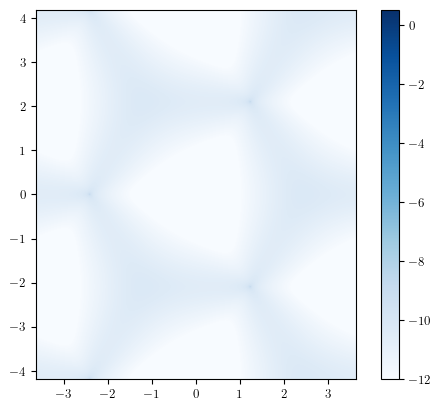

PyObject <matplotlib.colorbar.Colorbar object at 0x370c3efd0>

In [30]:
imshow(
    plottransform2.(qttdata),
    cmap=cmap, vmin=vmin, vmax=vmax, extent=intextent) |> colorbar

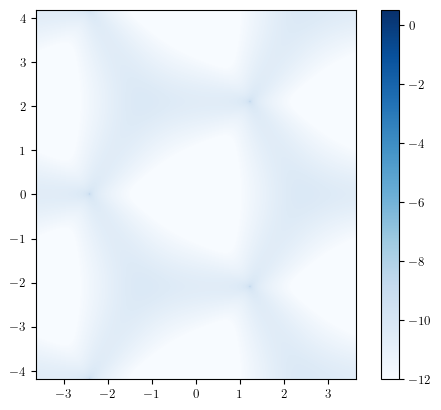

PyObject <matplotlib.colorbar.Colorbar object at 0x370e58f10>

In [32]:
imshow(
    plottransform2.(qttplotdata./(indexfactor^2)),
    cmap=cmap, vmin=vmin, vmax=vmax, extent=intextent) |> colorbar